## Import the base libraries required for this modeling

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load the training data

In [2]:
txns = pd.read_csv('./train.csv')
txns.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Explore the training data

In [3]:
# Info about the training data
txns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [4]:
# Describe the training data
txns.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
# Check if there any null values that we have to deal with
txns.isnull().values.any()
# There are no null values in this dataset

False

In [6]:
# Are there any correlations in the training data with regards to the feature columns var_*?
txns_features = txns.drop(columns=['ID_code','target'])
txns_features.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,-0.000868,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,0.000052,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,0.003701,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,0.002343,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


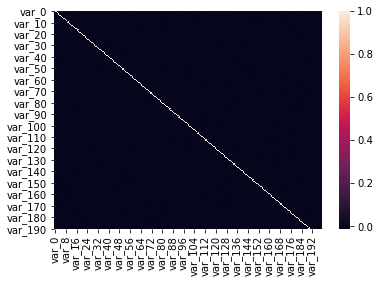

In [7]:
# Seaborn heatmap showing the correlation
sns.heatmap(txns_features.corr())

[]

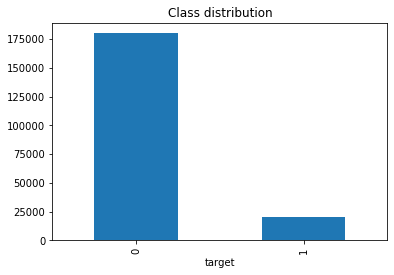

In [8]:
# Table below shows that we have a high class imbalance between the binary classification
txns.pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

## Split the data into training and test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Split the data into training and test set with a ration of 0.7:0.3 and constant random
X_train, X_test, y_train, y_test = train_test_split(txns_features, txns['target'], test_size=0.3, random_state=11, stratify=txns['target'])

In [11]:
# Preprocessing - Scaled
scaler_train = MinMaxScaler().fit(X_train)
X_train_scaled = scaler_train.transform(X_train)
scaler_test = MinMaxScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

## Hyperparameter tuning using Grid Search Cross Validation

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# GridSearchCV
lr = LogisticRegression()
params = {'solver':['lbfgs', 'saga'], 'C': [0.01, 0.1, 1, 10]}
gs_cv = GridSearchCV(estimator=lr, param_grid=params, cv=5)
# Fit the pipeline
gs_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'saga']})

In [14]:
gs_cv.best_params_

{'C': 1, 'solver': 'lbfgs'}

In [15]:
# LogisticRegression
lr_tuned = gs_cv.best_estimator_
# Fit the model
lr_tuned.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

## Evaluate the Model

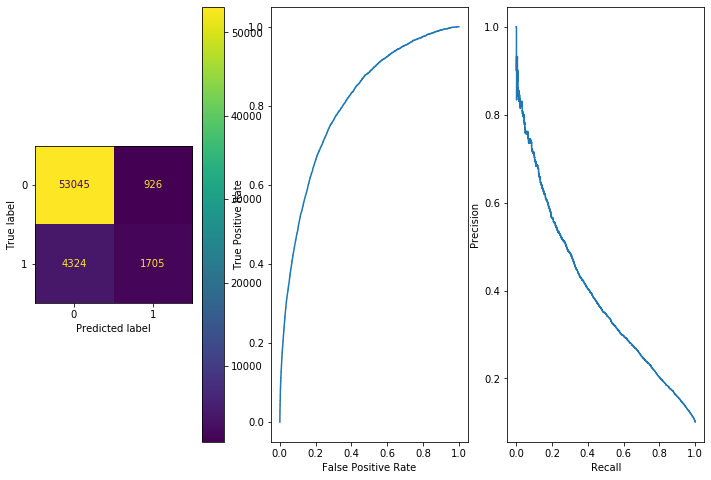

In [17]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Confusion Matrix
y_pred = lr_tuned.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
y_score = lr_tuned.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr_tuned.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Precision-Recall Curve
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=lr_tuned.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

In [18]:
y_pred = lr_tuned.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))
print("Recall: ", recall_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))
print("F1-Score: ", f1_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))

Accuracy:  0.9125
Precision:  0.6480425693652604
Recall:  0.2827998009620169
F1-Score:  0.39376443418013857


#### Accuracy is pretty high but from previous observation, we know that the data imbalance could be a prime reason driving this. Looking at the Precision/Recall/F1-score tells us the story that the model is sub-optimal and Accuracy is the wrong metric to look at in this scenario.

### Upsampling

In [ ]:
from sklearn.utils import resample

temp_df = pd.concat([X_train, y_train])

buy = temp_df[temp_df['target' == 1]]
not_buy = temp_df[temp_df['target' == 0]]

# Upsample to have equal number of customer buy and not_buy features
buy_upsampled = resample(buy, resample=True, n_samples=len(not_buy), random_state=11)

upsampled = pd.concat([not_buy, buy_upsampled])

# Check the class distribution
upsampled.pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

In [ ]:
# Create the feature and target dataframes including appropriate scaling
X_train_upsampled = upsampled.drop(['target'])
y_train_upsampled = upsampled['target']

scaler_train_upsampled = MinMaxScaler().fit(X_train)
X_train_upsampled_scaled = scaler_train_upsampled.transform(X_train_upsampled)

### Re-train the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV
lr = LogisticRegression()
params = {'solver':['lbfgs', 'saga'], 'C': [0.01, 0.1, 1, 10]}
gs_cv = GridSearchCV(estimator=lr, param_grid=params, cv=5)
# Fit the pipeline
gs_cv.fit(X_train_scaled, y_train)

gs_cv.best_params_

# LogisticRegression
lr_tuned = gs_cv.best_estimator_
# Fit the model
lr_tuned.fit(X_train_scaled, y_train)

### Re-Evaluate the Model

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Confusion Matrix
y_pred = lr_tuned.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
y_score = lr_tuned.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr_tuned.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Precision-Recall Curve
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=lr_tuned.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

In [ ]:
y_pred = lr_tuned.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))
print("Recall: ", recall_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))
print("F1-Score: ", f1_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))